## Example

`hishtlight text`

***
Horizontal line
***

**Bold text**

*Italic text*

# Postać modelu opisująca zjawisko transportu ciepła
$$T_m(z,t)=T_p+c_1 \, t-c_2 e^{-c_3 \, t}$$

### Importowanie potrzebnych bibliotek

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
my_data = pd.read_csv(r"C:\Users\margo\Dysk Google\Semestr_6\MIS\Projekt\OBIEKT.DAT",
    sep='\s+',names=['Time','Temperature'])
my_data.head()

,Time,Temperature
0,4.0,0.022222
1,8.0,0.016667
2,12.0,0.021111
3,16.0,0.016667
4,20.0,0.020000


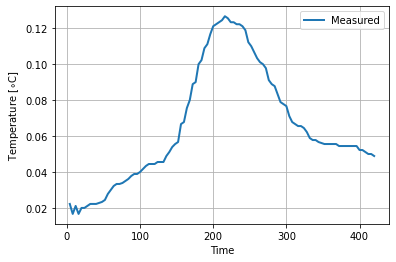

<Figure size 432x288 with 0 Axes>

In [9]:
%matplotlib inline

plt.plot(my_data['Time'],my_data['Temperature'],linewidth=2,label='Measured')
plt.xlabel('Time')
plt.ylabel('Temperature [$\circ$C]')
plt.grid()
plt.legend()
plt.show()
plt.tight_layout()

In [62]:
def temperature(t,z,Tp,V,D):
    return Tp+np.exp((V*z)/(2*D))*(z/(2*(np.pi*D*t**3)**0.5))*np.exp((-z**2/(4*D*t))-(t*V**2/(4*D)))

  

[2.66081251e+03 6.49999996e-02 2.66202100e+03 5.29960588e+03]
[[inf inf inf inf]
 [inf inf inf inf]
 [inf inf inf inf]
 [inf inf inf inf]]


<ipython-input-62-4602ab32d678>:2: RuntimeWarning: overflow encountered in exp
  return Tp+np.exp((V*z)/(2*D))*(z/(2*(np.pi*D*t**3)**0.5))*np.exp((-z**2/(4*D*t))-(t*V**2/(4*D)))
<ipython-input-62-4602ab32d678>:2: RuntimeWarning: invalid value encountered in multiply
  return Tp+np.exp((V*z)/(2*D))*(z/(2*(np.pi*D*t**3)**0.5))*np.exp((-z**2/(4*D*t))-(t*V**2/(4*D)))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


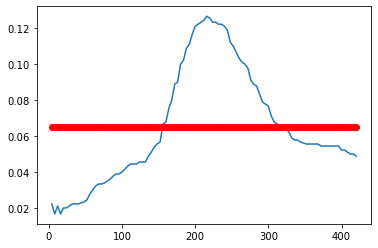

In [63]:
from scipy.optimize import curve_fit



g = [1,0.032,0.09,0.12]
t = my_data['Time'].values
temp = my_data['Temperature'].values
c,cov = curve_fit(temperature,t,temp)

print(c)
print(cov)

n = len(my_data['Time'])
y = np.empty(n)
for i in range(n):
    y[i] = temperature(my_data['Time'][i],c[0],c[1],c[2],c[3])

%matplotlib inline
plt.plot(my_data['Time'],my_data['Temperature'])
plt.plot(my_data['Time'],y,'ro')

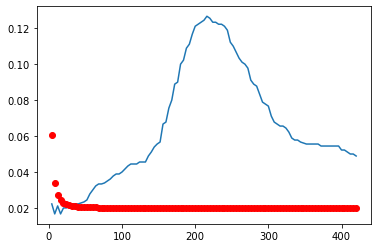

In [64]:
g = [4,0.02,0.9,12]

n = len(my_data['Time'])
y = np.empty(n)
for i in range(n):
    y[i] = temperature(my_data['Time'][i],g[0],g[1],g[2],g[3])

%matplotlib inline
plt.plot(my_data['Time'],my_data['Temperature'])
plt.plot(my_data['Time'],y,'ro')